In [1]:
from tensorflow.keras.preprocessing.text import one_hot

In [88]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# reading the train

In [367]:
data = pd.read_excel("./dataset/Data_Train.xlsx")
df = data.copy()

# reading the test data

In [348]:
df_test = pd.read_excel("./dataset/Data_Test.xlsx")

In [368]:
df[["story", "section"]] = data[["STORY", "SECTION"]]
df.drop(["STORY", "SECTION"], inplace = True, axis = 1)

In [369]:
df.head(5)

,story,section
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [350]:
df_test["story"] = df_test["STORY"]
df_test.drop(["STORY"], inplace = True, axis = 1)

(7628, 2)

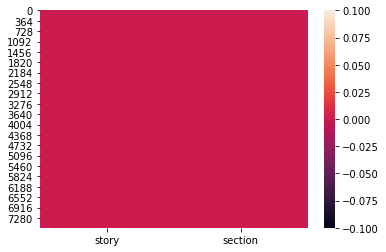

In [6]:
sns.heatmap(data.isnull())
data.shape

# tokenizing the story faeture

In [375]:
# stemming each story
import nltk 
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer


ps = PorterStemmer()
wordnet = WordNetLemmatizer()

corpus = []
story = ""
def tokenize(df):
    for i in range(len(df)):
        story = re.sub('[^a-zA-Z]', ' ', df["story"][i])
        story = story.lower()
        story = story.split()

        story =  [wordnet.lemmatize(word) for word in story if word not in stopwords.words("english")]
        story = " ".join(story)
        corpus.append(story)
    return corpus

In [376]:
corpus_train = tokenize(df)

#  Creating the word-embedding model

In [378]:
from tensorflow.keras.preprocessing.text import one_hot

#### vocabulary size
voc_size = 10000

#getting the onehot representation of each word in the sent
onehot_representation= [one_hot(words, voc_size) for words in corpus_train ]


# train test split

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(onehot_representation, df["section"], test_size = 0.20, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test),np.array(y_train), np.array(y_test)


# Creating the neural network

In [284]:
### word embedding representation
from tensorflow.keras.layers import Embedding 
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf 

# intializing storu length
sentence_length = 600
X_train = pad_sequences(X_train, padding = "pre", 
                              maxlen = sentence_length)
X_test = pad_sequences(X_test, padding = "pre", 
                              maxlen = sentence_length)




In [287]:
X_test[0].shape

(600,)

In [288]:
len(embedded_docs[0])

600

In [289]:

model = tf.keras.Sequential()
model.add(Embedding(voc_size, 20 , input_length = sentence_length))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='sgd', loss = keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])


In [290]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 600, 20)           200000    
_________________________________________________________________
flatten_21 (Flatten)         (None, 12000)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 48004     
Total params: 248,004
Trainable params: 248,004
Non-trainable params: 0
_________________________________________________________________


In [291]:
## fitting the model
model.fit(X_train, y_train, epochs= 150, validation_data=(X_test, y_test), verbose=1)

Train on 6102 samples, validate on 1526 samples
Epoch 1/150
6102/6102 [==============================] - 4s 635us/sample - loss: 1.3318 - accuracy: 0.3650 - val_loss: 1.3025 - val_accuracy: 0.3598
Epoch 2/150
6102/6102 [==============================] - 3s 527us/sample - loss: 1.2617 - accuracy: 0.4346 - val_loss: 1.2251 - val_accuracy: 0.4705
Epoch 3/150
6102/6102 [==============================] - 3s 531us/sample - loss: 1.2276 - accuracy: 0.4485 - val_loss: 1.2214 - val_accuracy: 0.4699
Epoch 4/150
6102/6102 [==============================] - 3s 525us/sample - loss: 1.2226 - accuracy: 0.4423 - val_loss: 1.2150 - val_accuracy: 0.4463
Epoch 5/150
6102/6102 [==============================] - 3s 524us/sample - loss: 1.2176 - accuracy: 0.4544 - val_loss: 1.2071 - val_accuracy: 0.4692
Epoch 6/150
6102/6102 [==============================] - 3s 544us/sample - loss: 1.2160 - accuracy: 0.4569 - val_loss: 1.2054 - val_accuracy: 0.4718
Epoch 7/150
6102/6102 [==============================] - 3

6102/6102 [==============================] - 4s 582us/sample - loss: 0.4889 - accuracy: 0.8761 - val_loss: 0.5215 - val_accuracy: 0.8571
Epoch 56/150
6102/6102 [==============================] - 4s 690us/sample - loss: 0.4744 - accuracy: 0.8853 - val_loss: 0.5029 - val_accuracy: 0.8663
Epoch 57/150
6102/6102 [==============================] - 4s 699us/sample - loss: 0.4609 - accuracy: 0.8895 - val_loss: 0.4871 - val_accuracy: 0.8663
Epoch 58/150
6102/6102 [==============================] - 4s 660us/sample - loss: 0.4473 - accuracy: 0.8945 - val_loss: 0.4754 - val_accuracy: 0.8644
Epoch 59/150
6102/6102 [==============================] - 4s 662us/sample - loss: 0.4347 - accuracy: 0.8963 - val_loss: 0.4649 - val_accuracy: 0.8866
Epoch 60/150
6102/6102 [==============================] - 4s 627us/sample - loss: 0.4218 - accuracy: 0.9018 - val_loss: 0.4511 - val_accuracy: 0.8794
Epoch 61/150
6102/6102 [==============================] - 3s 525us/sample - loss: 0.4092 - accuracy: 0.9043 - val

6102/6102 [==============================] - 3s 510us/sample - loss: 0.1688 - accuracy: 0.9590 - val_loss: 0.2181 - val_accuracy: 0.9318
Epoch 110/150
6102/6102 [==============================] - 3s 495us/sample - loss: 0.1686 - accuracy: 0.9590 - val_loss: 0.2133 - val_accuracy: 0.9384
Epoch 111/150
6102/6102 [==============================] - 3s 511us/sample - loss: 0.1656 - accuracy: 0.9603 - val_loss: 0.2162 - val_accuracy: 0.9332
Epoch 112/150
6102/6102 [==============================] - 3s 499us/sample - loss: 0.1637 - accuracy: 0.9623 - val_loss: 0.2097 - val_accuracy: 0.9325
Epoch 113/150
6102/6102 [==============================] - 3s 521us/sample - loss: 0.1616 - accuracy: 0.9635 - val_loss: 0.2090 - val_accuracy: 0.9404
Epoch 114/150
6102/6102 [==============================] - 3s 534us/sample - loss: 0.1602 - accuracy: 0.9636 - val_loss: 0.2060 - val_accuracy: 0.9364
Epoch 115/150
6102/6102 [==============================] - 3s 506us/sample - loss: 0.1584 - accuracy: 0.9638

# test data prediction

In [353]:
# df_test["story"] = df_test["STORY"]
# df_test.drop(["STORY"], inplace = True, axis = 1)

corpus_test = tokenize(df_test)
onehot_representation_test = [one_hot(words, voc_size) for words in corpus_test]
test = np.array(onehot_representation_test)
#pad sequencing each sentence
test = pad_sequences(test, padding = "pre", 
                              maxlen = sentence_length)



In [356]:
y_final_pred = model.predict_classes(test)

In [357]:
submission = pd.DataFrame({"SECTION" : y_final_pred})

In [361]:
### saving the submission file as excel
submission.to_excel("submission.xlsx")

# saving the model

In [362]:
model.save('model')
model.save("model/model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [381]:
df.shape

(7628, 2)